<IPython.core.display.Javascript object>


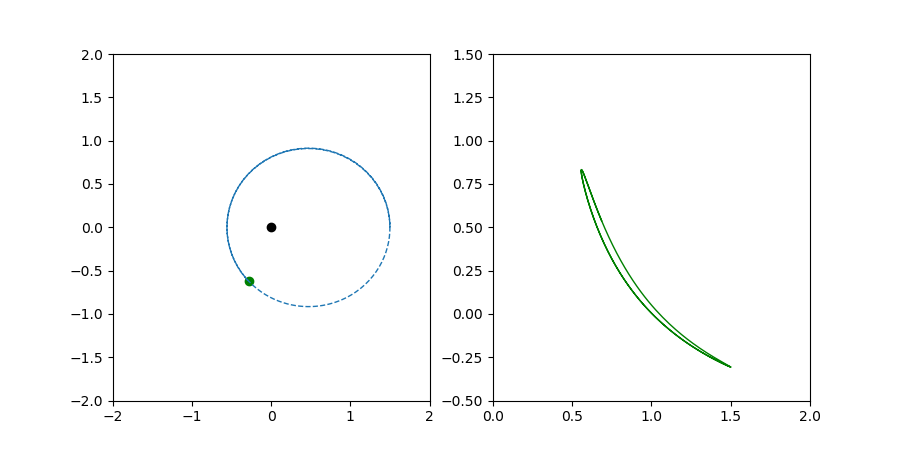

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize=(9, 4.5))
ax1 = fig.add_subplot(121, xlim=(-2, 2), ylim=(-2, 2))
ax2 = fig.add_subplot(122, xlim=(0, 2), ylim=(-0.5, 1.5))


def init():
    planet.set_data([], [])
    rphi.set_data([], [])
    energy.set_data([], [])
    return planet, rphi, energy


def redraw(i, planet, rphi, energy, r, v, A, dt):
    global R, E # ммм, глобалы ебать
    r += v*dt
    R = np.append(R, r, axis=1)
    e = (v[0]**2 + v[1]**2 + v[2]**2) - A / (r[0]**2 + r[1]**2 + r[2]**2)**(1/2)
    v += - A * (r/(r[0]**2 + r[1]**2 + r[2]**2)**(3/2)) *dt
    E = np.append(E, e)
    
    planet.set_data(r[:2])
    rphi.set_data(R[:2])
    energy.set_data((R[0]**2 + R[1]**2 + R[2]**2)**(1/2), E)
    return planet, rphi, energy


dt = 0.05
r = np.array([[1.5], [0], [0]], dtype=np.float64)  # r0
v = np.array([[0], [0.6], [0]], dtype=np.float64)  # v0
R = r
A = 1
e0 = (v[0]**2 + v[1]**2 + v[2]**2) - A / (r[0]**2 + r[1]**2 + r[2]**2)**(1/2)
E = np.array([e0], dtype=np.float64)


r = r - v*dt/2

planet, = ax1.plot(r[:2], 'bo', c='green', lw=1)
rphi, = ax1.plot(r[:2], ls='--', lw=1) 
center, = ax1.plot(0, 0, 'bo', c='black', lw=3)
energy, = ax2.plot([], [], c='green', lw=1)

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=600,
                               init_func=init,
                               interval=10,
                               blit=True,
                               fargs=(planet,
                                      rphi,
                                      energy,
                                      r, v, A, dt),
                               )